## Learning Rate Finder

In [ ]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai.vision import *
from fastai.callbacks import *

Learning rate finder plots lr vs loss relationship for a [`Learner`](/basic_train.html#Learner). The idea is to reduce the amount of guesswork on picking a good starting learning rate.

**Overview:**  
1. First run lr_find `learn.lr_find()`
2. Plot the learning rate vs loss `learn.recorder.plot()`
3. Pick a learning rate before it diverges then start training

**Technical Details:** (first [described]('https://arxiv.org/abs/1506.01186') by Leslie Smith)  
>Train [`Learner`](/basic_train.html#Learner) over a few iterations. Start with a very low `start_lr` and change it at each mini-batch until it reaches a very high `end_lr`. [`Recorder`](/basic_train.html#Recorder) will record the loss at each iteration. Plot those losses against the learning rate to find the optimal value before it diverges.

## Choosing a good learning rate

For a more intuitive explanation, please check out [Sylvain Gugger's post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
def simple_learner(): return Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy])
learn = simple_learner()

First we run this command to launch the search:

In [ ]:
show_doc(Learner.lr_find)

<h4 id="lr_find" class="doc_header"><code>lr_find</code><a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L24" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#lr_find-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>lr_find</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`start_lr`**:`Floats`=***`1e-07`***, **`end_lr`**:`Floats`=***`10`***, **`num_it`**:`int`=***`100`***, **`stop_div`**:`bool`=***`True`***, **`wd`**:`float`=***`None`***)

<div class="collapse" id="lr_find-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#lr_find-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>lr_find</code>:</p><ul><li><code>pytest -sv tests/test_train.py::test_lr_find</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_train.py#L16" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_train.py::test_lrfind</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_train.py#L84" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`. If `stop_div`, stops when loss diverges.  

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Then we plot the loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate, so we plot with a log scale. 

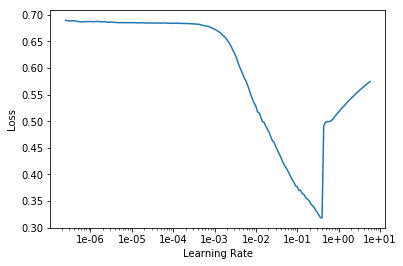

In [ ]:
learn.recorder.plot()

Then, we choose a value that is approximately in the middle of the sharpest downward slope. This is given as an indication by the LR Finder tool, so let's try 1e-2.

In [ ]:
simple_learner().fit(2, 1e-2)

Don't just pick the minimum value from the plot!

In [ ]:
learn = simple_learner()
simple_learner().fit(2, 1e-0)

Picking a value before the downward slope results in slow training:

In [ ]:
learn = simple_learner()
simple_learner().fit(2, 1e-3)

#### Suggested LR

If you pass `suggestion=True` in `learn.recorder.plot`, you will see the point where the gardient is the steepest with a  
red dot on the graph. We can use that point as a first guess for an LR.

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-03


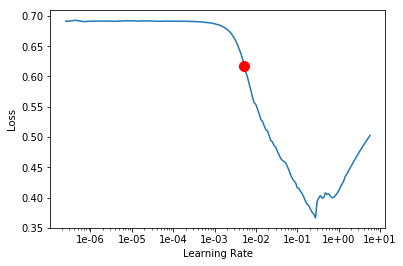

In [ ]:
learn.recorder.plot(suggestion=True)

You can access the corresponding learning rate like this:

In [ ]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.005248074602497722

In [ ]:
learn = simple_learner()
simple_learner().fit(2, min_grad_lr)

In [ ]:
show_doc(LRFinder)

<h2 id="LRFinder" class="doc_header"><code>class</code> <code>LRFinder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L9" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#LRFinder-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>LRFinder</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`start_lr`**:`float`=***`1e-07`***, **`end_lr`**:`float`=***`10`***, **`num_it`**:`int`=***`100`***, **`stop_div`**:`bool`=***`True`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="LRFinder-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#LRFinder-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>LRFinder</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Causes `learn` to go on a mock training from `start_lr` to `end_lr` for `num_it` iterations.  

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(LRFinder.on_train_begin)

<h4 id="LRFinder.on_train_begin" class="doc_header"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L16" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#LRFinder-on_train_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_begin</code>(**`pbar`**, **\*\*`kwargs`**:`Any`)

<div class="collapse" id="LRFinder-on_train_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#LRFinder-on_train_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Initialize optimizer and learner hyperparameters.  

In [ ]:
show_doc(LRFinder.on_batch_end)

<h4 id="LRFinder.on_batch_end" class="doc_header"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L25" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#LRFinder-on_batch_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_batch_end</code>(**`iteration`**:`int`, **`smooth_loss`**:`TensorOrNumber`, **\*\*`kwargs`**:`Any`)

<div class="collapse" id="LRFinder-on_batch_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#LRFinder-on_batch_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_batch_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Determine if loss has runaway and we should stop.  

In [ ]:
show_doc(LRFinder.on_epoch_end)

<h4 id="Callback.on_epoch_end" class="doc_header"><code>on_epoch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callback.py#L186" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Callback-on_epoch_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_epoch_end</code>(**\*\*`kwargs`**:`Any`)

<div class="collapse" id="Callback-on_epoch_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Callback-on_epoch_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_epoch_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Called at the end of an epoch.  

In [ ]:
show_doc(LRFinder.on_train_end)

<h4 id="LRFinder.on_train_end" class="doc_header"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L33" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#LRFinder-on_train_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_end</code>(**\*\*`kwargs`**:`Any`)

<div class="collapse" id="LRFinder-on_train_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#LRFinder-on_train_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Cleanup learn model weights disturbed during LRFinder exploration.  